# Importing the Libraries

In [3]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline

In [4]:
import warnings
warnings.filterwarnings("ignore")

# Reading Retinopathy Data

In [5]:
df=pd.read_excel("cleaned_pronostico_dataset.xlsx")

In [6]:
df.head()

,ID,age,systolic_bp,diastolic_bp,cholesterol,prognosis
0,0,77.196340,85.288742,80.021878,79.957109,retinopathy
1,1,63.529850,99.379736,84.852361,110.382411,retinopathy
2,2,69.003986,111.349455,109.850616,100.828246,retinopathy
3,3,82.638210,95.056128,79.666851,87.066303,retinopathy
4,4,78.346286,109.154591,90.713220,92.511770,retinopathy


In [7]:
df.columns

Index(['ID', 'age', 'systolic_bp', 'diastolic_bp', 'cholesterol', 'prognosis'], dtype='object')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6000 entries, 0 to 5999
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   ID            6000 non-null   int64  
 1   age           6000 non-null   float64
 2   systolic_bp   6000 non-null   float64
 3   diastolic_bp  6000 non-null   float64
 4   cholesterol   6000 non-null   float64
 5   prognosis     6000 non-null   object 
dtypes: float64(4), int64(1), object(1)
memory usage: 281.4+ KB


# Checking for null Values

In [9]:
df.isnull().sum()

ID              0
age             0
systolic_bp     0
diastolic_bp    0
cholesterol     0
prognosis       0
dtype: int64

In [10]:
df.age=df.age.astype(int)

In [11]:
df.head()

,ID,age,systolic_bp,diastolic_bp,cholesterol,prognosis
0,0,77,85.288742,80.021878,79.957109,retinopathy
1,1,63,99.379736,84.852361,110.382411,retinopathy
2,2,69,111.349455,109.850616,100.828246,retinopathy
3,3,82,95.056128,79.666851,87.066303,retinopathy
4,4,78,109.154591,90.713220,92.511770,retinopathy


In [12]:
df['prognosis'].value_counts()

retinopathy       3087
no_retinopathy    2913
Name: prognosis, dtype: int64

# Checking  Depedent Variable is symmetric or not?

Checking whether the data is balanced or not 

<AxesSubplot:xlabel='prognosis', ylabel='count'>

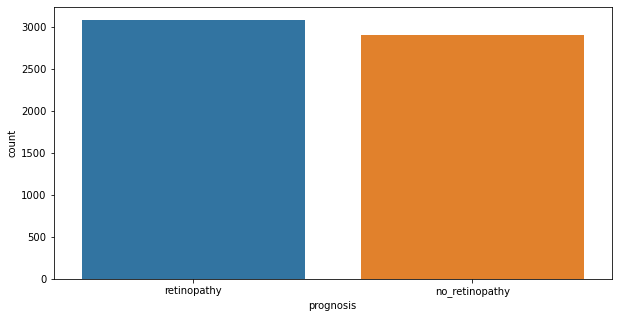

In [13]:
plt.figure(figsize=(10,5))
sns.countplot(df['prognosis'])

Conclusion: As per the graph no of Zeros(no retinopathy) and no of ones(ratinopathy) value counts are almost equal.so we can
    consider this as symmetrically distributed data/balanced data for building models.

Text(0.5, 1.0, 'prognosis opinion in percentage ')

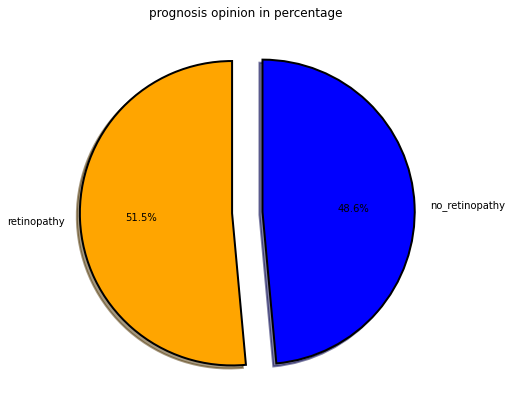

In [14]:
fig = plt.figure(figsize=(10,7))
colors = ("orange", "blue")
wp = {'linewidth':2, 'edgecolor':"black"}
tags = df['prognosis'].value_counts()
explode = (0.1,0.1)
tags.plot(kind='pie', autopct='%1.1f%%', shadow=True, colors = colors,
         startangle=90, wedgeprops = wp, explode = explode, label='')
plt.title('prognosis opinion in percentage ')

# Checking How Features are Distributed from its Mean value by Box Plot

{'whiskers': [<matplotlib.lines.Line2D at 0x22685fee040>,
 'caps': [<matplotlib.lines.Line2D at 0x22685fee700>,
 'boxes': [<matplotlib.lines.Line2D at 0x22685fd9ca0>],
 'medians': [<matplotlib.lines.Line2D at 0x22685feedc0>],
 'fliers': [<matplotlib.lines.Line2D at 0x22685fe5160>],
 'means': []}

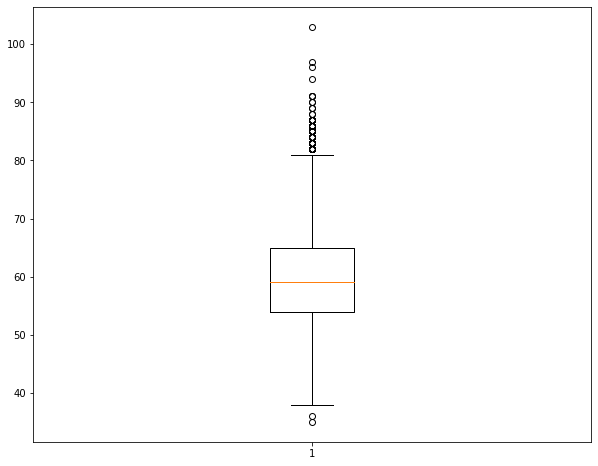

In [15]:
plt.figure(figsize=(10,8))
plt.boxplot(df.age)

{'whiskers': [<matplotlib.lines.Line2D at 0x22685e15100>,
 'caps': [<matplotlib.lines.Line2D at 0x22685e157c0>,
 'boxes': [<matplotlib.lines.Line2D at 0x22685e06d60>],
 'medians': [<matplotlib.lines.Line2D at 0x22685e15e80>],
 'fliers': [<matplotlib.lines.Line2D at 0x22685e34220>],
 'means': []}

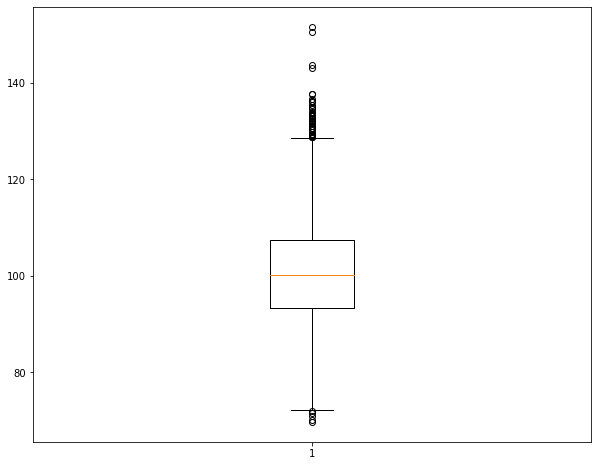

In [16]:
plt.figure(figsize=(10,8))
plt.boxplot(df.systolic_bp)

{'whiskers': [<matplotlib.lines.Line2D at 0x22685f6fbe0>,
 'caps': [<matplotlib.lines.Line2D at 0x22685f702e0>,
 'boxes': [<matplotlib.lines.Line2D at 0x22685f6f880>],
 'medians': [<matplotlib.lines.Line2D at 0x22685f709a0>],
 'fliers': [<matplotlib.lines.Line2D at 0x22685f70d00>],
 'means': []}

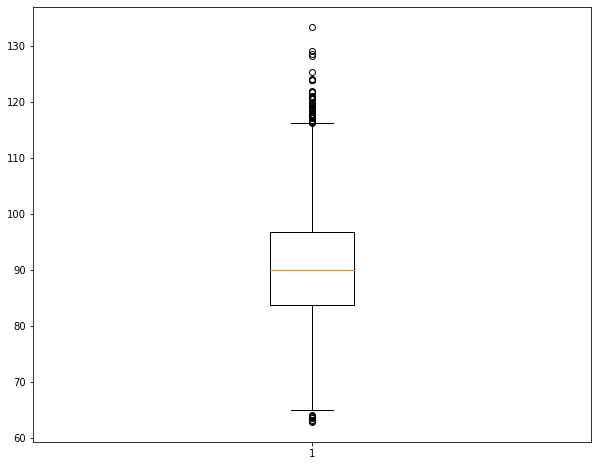

In [17]:
plt.figure(figsize=(10,8))
plt.boxplot(df.diastolic_bp)


{'whiskers': [<matplotlib.lines.Line2D at 0x22685ccab50>,
 'caps': [<matplotlib.lines.Line2D at 0x22685cdf250>,
 'boxes': [<matplotlib.lines.Line2D at 0x22685cca7f0>],
 'medians': [<matplotlib.lines.Line2D at 0x22685cdf910>],
 'fliers': [<matplotlib.lines.Line2D at 0x22685cdfc70>],
 'means': []}

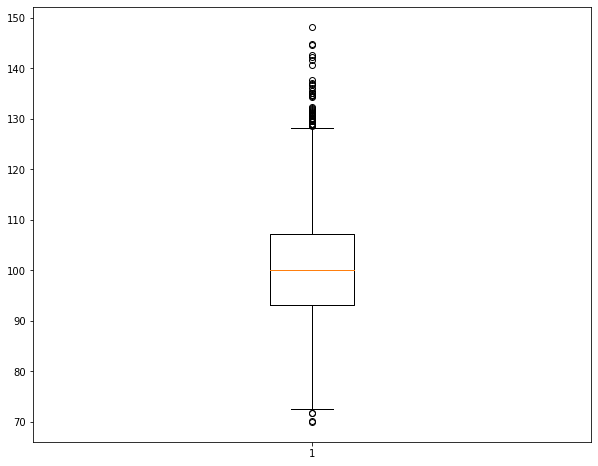

In [18]:
plt.figure(figsize=(10,8))
plt.boxplot(df.cholesterol)

# How independent features are related to each other?

In [19]:
df.corr()

,ID,age,systolic_bp,diastolic_bp,cholesterol
ID,1.000000,0.011582,-0.021189,-0.022656,0.010583
age,0.011582,1.000000,0.010493,-0.004957,-0.007063
systolic_bp,-0.021189,0.010493,1.000000,0.405406,0.406029
diastolic_bp,-0.022656,-0.004957,0.405406,1.000000,0.398345
cholesterol,0.010583,-0.007063,0.406029,0.398345,1.000000


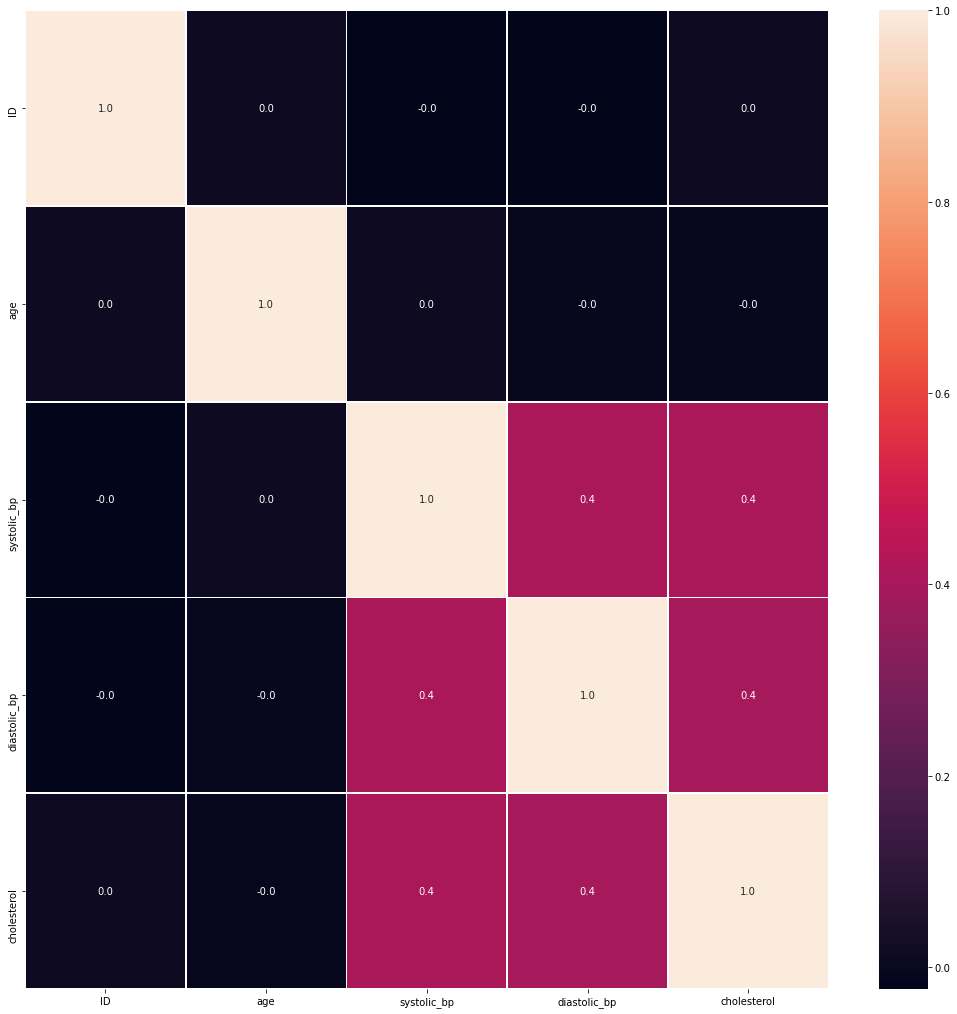

In [20]:
# correlation heatmap( to check corelation between columns)

f,ax = plt.subplots(figsize=(18,18))
sns.heatmap(df.corr(), annot=True, linewidths =.5, fmt ='.1f',ax=ax)
plt.show()

Text(0, 0.5, 'diastolic_bp')

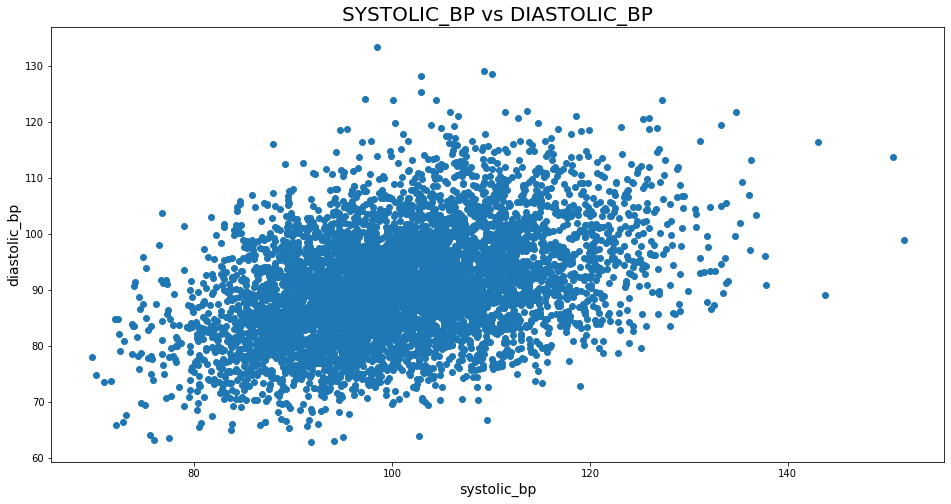

In [21]:
plt.figure(figsize=(16,8))
plt.scatter(df['systolic_bp'],df['diastolic_bp'])
plt.title("SYSTOLIC_BP vs DIASTOLIC_BP",fontsize=20 )
plt.xlabel('systolic_bp',fontsize=14)
plt.ylabel('diastolic_bp',fontsize=14)

Text(0, 0.5, 'cholesterol')

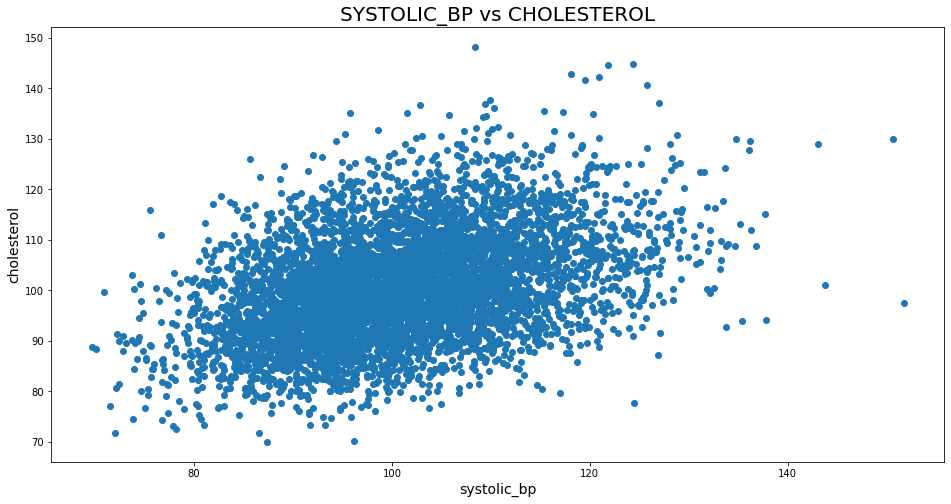

In [22]:
plt.figure(figsize=(16,8))
plt.scatter(df['systolic_bp'],df['cholesterol'])
plt.title("SYSTOLIC_BP vs CHOLESTEROL",fontsize=20 )
plt.xlabel('systolic_bp',fontsize=14)
plt.ylabel('cholesterol',fontsize=14)

Text(0, 0.5, 'cholesterol')

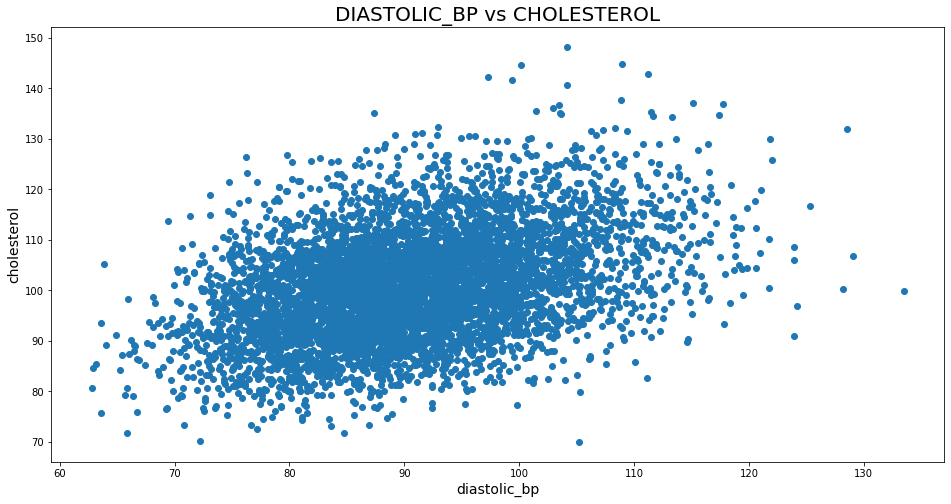

In [23]:
plt.figure(figsize=(16,8))
plt.scatter(df['diastolic_bp'],df['cholesterol'])
plt.title("DIASTOLIC_BP vs CHOLESTEROL",fontsize=20 )
plt.xlabel('diastolic_bp',fontsize=14)
plt.ylabel('cholesterol',fontsize=14)

Conclusion: From the Calculated value of corelation between these features(i.e 0.4) and from above graph we can say there is no clear correlation between them it is close to Randomness

# Converting  Dependent/Target Feature to numerical value from  Catergorical value "prognosis"

In [24]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
for i in df.prognosis:
    df.prognosis=label_encoder.fit_transform(df.prognosis)
df.head()

,ID,age,systolic_bp,diastolic_bp,cholesterol,prognosis
0,0,77,85.288742,80.021878,79.957109,1
1,1,63,99.379736,84.852361,110.382411,1
2,2,69,111.349455,109.850616,100.828246,1
3,3,82,95.056128,79.666851,87.066303,1
4,4,78,109.154591,90.713220,92.511770,1


# to check for the duplicate values

In [25]:
df.duplicated().shape

(6000,)

In [26]:
df.drop_duplicates().reset_index(drop=True)
df

,ID,age,systolic_bp,diastolic_bp,cholesterol,prognosis
0,0,77,85.288742,80.021878,79.957109,1
1,1,63,99.379736,84.852361,110.382411,1
2,2,69,111.349455,109.850616,100.828246,1
3,3,82,95.056128,79.666851,87.066303,1
4,4,78,109.154591,90.713220,92.511770,1
...,...,...,...,...,...,...
5995,5995,49,94.857639,86.615671,107.643986,0
5996,5996,63,100.039527,93.515186,104.971404,1
5997,5997,55,98.421446,102.697875,120.875951,1
5998,5998,63,106.809289,88.060631,106.052213,1


In [27]:
# Eliminating the Unwanted Columns
df1=df.drop('ID',axis=1)

In [28]:
df1

,age,systolic_bp,diastolic_bp,cholesterol,prognosis
0,77,85.288742,80.021878,79.957109,1
1,63,99.379736,84.852361,110.382411,1
2,69,111.349455,109.850616,100.828246,1
3,82,95.056128,79.666851,87.066303,1
4,78,109.154591,90.713220,92.511770,1
...,...,...,...,...,...
5995,49,94.857639,86.615671,107.643986,0
5996,63,100.039527,93.515186,104.971404,1
5997,55,98.421446,102.697875,120.875951,1
5998,63,106.809289,88.060631,106.052213,1


In [29]:
df1.prognosis.value_counts()

1    3087
0    2913
Name: prognosis, dtype: int64

In [30]:
# lest check for the normality
df1.skew(axis=0,skipna=True)

age             0.441397
systolic_bp     0.334655
diastolic_bp    0.336555
cholesterol     0.361514
prognosis      -0.058039
dtype: float64

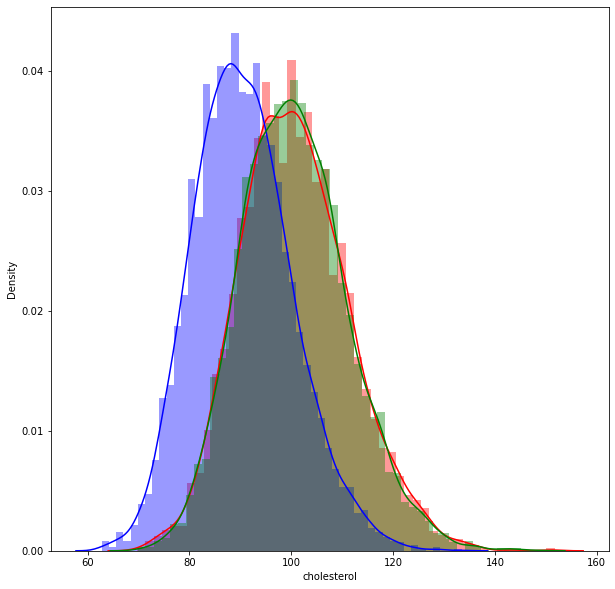

In [31]:
plt.figure(figsize=(10,10))
sns.distplot(df.systolic_bp,color="red",label="SYSTOLIC_BP")
sns.distplot(df.diastolic_bp,color="blue",label="DIASTOLIC_BP")
sns.distplot(df.cholesterol,color="green",label="CHOLESTEROL")
plt.show()